# Cleaning data

In [2]:
# Importing needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes = True)

In [3]:
# Upload the files with data

df = pd.read_csv('Houses.csv', encoding = 'latin-1')

In [4]:
# Checking the data types

df.dtypes

Unnamed: 0      int64
address        object
city           object
floor         float64
id            float64
latitude      float64
longitude     float64
price         float64
rooms         float64
sq            float64
year          float64
dtype: object

In [5]:
# Change of data format in columns: 'floor', 'rooms', 'year' to integer

df['floor'] = pd.to_numeric(df['floor'], downcast='integer')
df['rooms'] = pd.to_numeric(df['rooms'], downcast='integer')
df['year'] = pd.to_numeric(df['year'], downcast='integer')
df.dtypes

Unnamed: 0      int64
address        object
city           object
floor            int8
id            float64
latitude      float64
longitude     float64
price         float64
rooms            int8
sq            float64
year            int16
dtype: object

In [6]:
# Removing columns from df that are not needed for the analysis

df = df.drop(['Unnamed: 0', 'id', 'latitude', 'longitude'] , axis = 1)
df

,address,city,floor,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,749000.0,3,74.05,2021
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021
2,Krowodrza Czarnowiejska,Kraków,2,427000.0,2,37.00,1970
3,Grunwald,Poznañ,2,1290000.0,5,166.00,1935
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020
...,...,...,...,...,...,...,...
23759,Stare Miasto Naramowice,Poznañ,0,543000.0,4,77.00,2020
23760,W³ochy,Warszawa,4,910000.0,3,71.00,2017
23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0,430695.0,3,50.67,2022
23762,Podgórze Duchackie Walerego S³awka,Kraków,6,359000.0,2,38.86,2021


In [7]:
# Rename columns (not needed, but looks better)

df = df.rename(columns = {'address':'Address', 
                          'city':'City', 
                          'floor':'Floor', 
                          'price':'Price', 
                          'rooms':'Rooms', 
                          'year':'Year' })

In [8]:
# Checking the total number of rows and columns

df.shape

(23764, 7)

In [9]:
# Checking the rows containing duplicate data

duplicate_rows_df = df[df.duplicated()]
print('Number od duplicate rows: ' , duplicate_rows_df.shape)

Number od duplicate rows:  (1539, 7)


In [10]:
# Used to count the number of rows before removing the data

df.count()

Address    23764
City       23764
Floor      23764
Price      23764
Rooms      23764
sq         23764
Year       23764
dtype: int64

In [11]:
# Removing duplicates from df

df.drop_duplicates(inplace=True)

In [12]:
# Counting the number of rows after removing duplicates

df.count()

Address    22225
City       22225
Floor      22225
Price      22225
Rooms      22225
sq         22225
Year       22225
dtype: int64

In [13]:
# Checking data for empty cells

df.info()

# This means that there are no empty values in this df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22225 entries, 0 to 23763
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  22225 non-null  object 
 1   City     22225 non-null  object 
 2   Floor    22225 non-null  int8   
 3   Price    22225 non-null  float64
 4   Rooms    22225 non-null  int8   
 5   sq       22225 non-null  float64
 6   Year     22225 non-null  int16  
dtypes: float64(2), int16(1), int8(2), object(2)
memory usage: 955.0+ KB


In [14]:
print(df.isnull().sum())

# No empty cells (no other check needed)

Address    0
City       0
Floor      0
Price      0
Rooms      0
sq         0
Year       0
dtype: int64


In [15]:
# Add a column with price / sq conversion

result = df['Price'] / df['sq']
df['Price_per_sq'] = round(result, 2)
df = df.reset_index(drop=True) 
df.head()

,Address,City,Floor,Price,Rooms,sq,Year,Price_per_sq
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,749000.0,3,74.05,2021,10114.79
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021,9866.61
2,Krowodrza Czarnowiejska,Kraków,2,427000.0,2,37.00,1970,11540.54
3,Grunwald,Poznañ,2,1290000.0,5,166.00,1935,7771.08
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020,9485.71


In [16]:
df = df.reset_index(drop=True) 
df

,Address,City,Floor,Price,Rooms,sq,Year,Price_per_sq
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,749000.0,3,74.05,2021,10114.79
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021,9866.61
2,Krowodrza Czarnowiejska,Kraków,2,427000.0,2,37.00,1970,11540.54
3,Grunwald,Poznañ,2,1290000.0,5,166.00,1935,7771.08
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020,9485.71
...,...,...,...,...,...,...,...,...
22220,Rembertów Gwarków,Warszawa,5,360000.0,3,50.00,2022,7200.00
22221,Nowe Miasto Rataje Wagrowska,Poznañ,3,294021.0,2,35.23,2022,8345.76
22222,Stare Miasto Naramowice,Poznañ,0,543000.0,4,77.00,2020,7051.95
22223,Podgórze Duchackie Walerego S³awka,Kraków,6,359000.0,2,38.86,2021,9238.29


# EDA

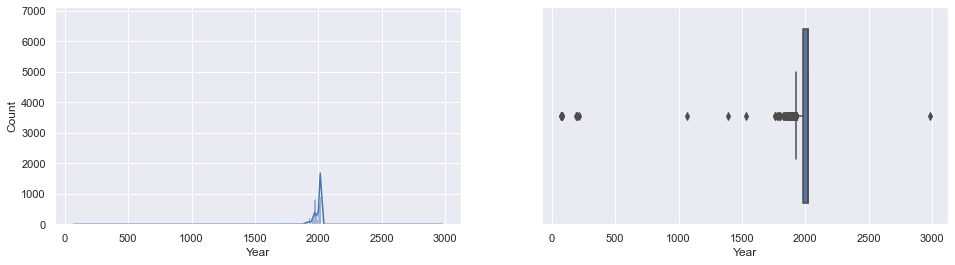

In [17]:
# Year

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Year'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['Year'], data=df, ax=ax[1])
plt.show()

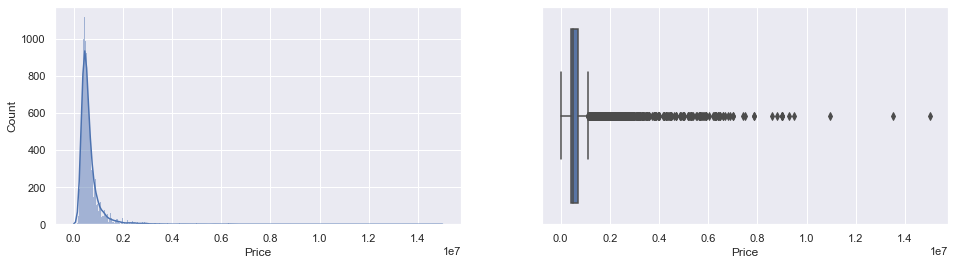

In [18]:
# Price

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Price'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['Price'], data=df, ax=ax[1])
plt.show()

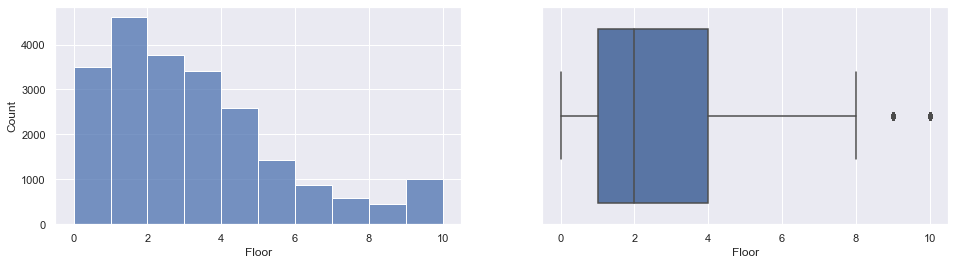

In [19]:
# Floor
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Floor'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['Floor'], data=df, ax=ax[1])
plt.show()

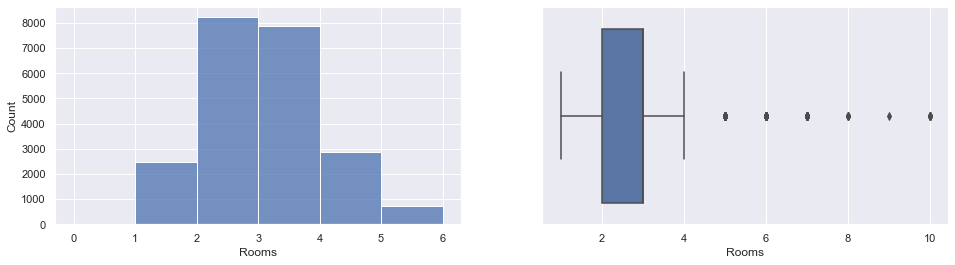

In [20]:
# Rooms

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Rooms'], data=df, bins=list(range(0,7)), ax=ax[0])
sns.boxplot(x=df['Rooms'], data=df, ax=ax[1])
plt.show()

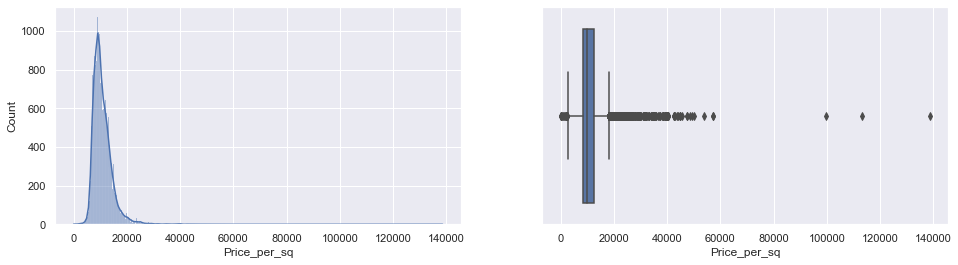

In [21]:
# Price_per_sq

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Price_per_sq'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['Price_per_sq'], data=df, ax=ax[1])
plt.show()

In [22]:
# sq

#fig, ax = plt.subplots(1,2, figsize=(16,4))
#sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0])
#sns.boxplot(x=df['sq'], data=df, ax=ax[1])
#plt.show()

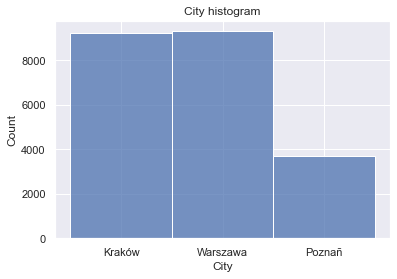

In [23]:
# City

sns.histplot(x=df['City'], data=df)
plt.title("City histogram")
plt.show()

# Handling with outliners

In [24]:
# Checking df

df.describe()

# the min and max values of'year' and 'sq' have no sense, it means there are wrong values in df

,Floor,Price,Rooms,sq,Year,Price_per_sq
count,22225.000000,2.222500e+04,22225.000000,2.222500e+04,22225.000000,22225.000000
mean,2.814488,6.544162e+05,2.617683,1.058202e+02,1999.967244,10810.198477
std,2.464417,5.437284e+05,1.000505,6.756115e+03,49.124076,3905.967188
min,0.000000,5.000000e+03,1.000000,8.800000e+00,70.000000,1.000000
25%,1.000000,4.150000e+05,2.000000,4.200000e+01,1983.000000,8443.750000
50%,2.000000,5.250000e+05,3.000000,5.399000e+01,2018.000000,9989.930000
75%,4.000000,7.021850e+05,3.000000,6.890000e+01,2021.000000,12368.420000
max,10.000000,1.500000e+07,10.000000,1.007185e+06,2980.000000,138636.360000


In [25]:
# Removing extreme ouliners

sq_extr = df.loc[df['sq'] > 2000].index.tolist()
df.drop(sq_extr, axis=0, inplace=True)

In [27]:
# Limiting the year

year_extr = df.loc[(df['Year'] > 2025) & (df['Year'] < 1900)].index.tolist()
df.drop(year_extr, axis=0, inplace=True)

# Removing extreme ouliners 'Price_per_sq'

price_per_sq_extr = df.loc[df['Price_per_sq'] > 50000].index.tolist()
df.drop(price_per_sq_extr, axis=0, inplace=True)

In [28]:
# Ouliners

cols_to_cap = ['sq', 'Year', 'Price_per_sq']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)

    df[col] = np.where(df[col] > upper_bound, upper_bound,
                      np.where(df[col] < lower_bound, lower_bound, df[col]))

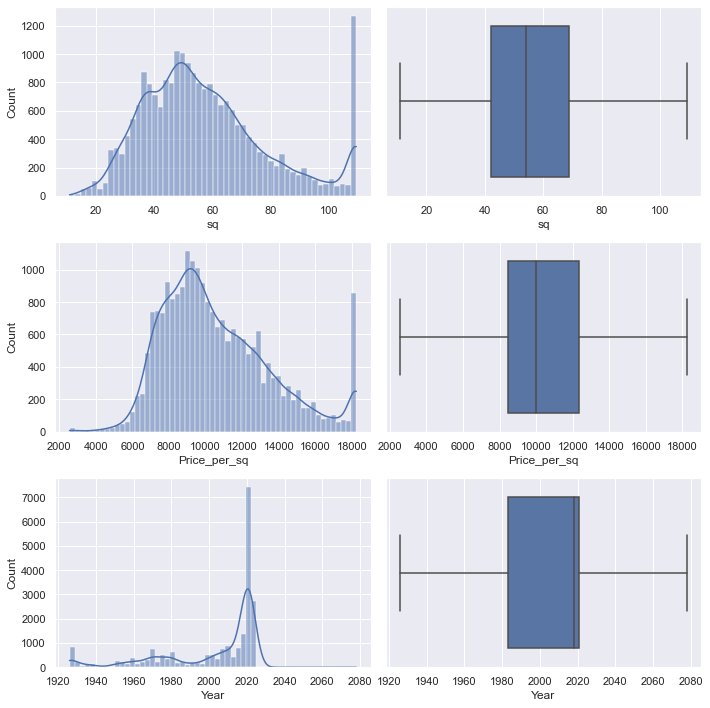

In [29]:
# Plot the results

fig, ax = plt.subplots(3,2, figsize=(10,10))

sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0,0])
sns.boxplot(x=df['sq'], data=df, ax=ax[0,1])
sns.histplot(x=df['Price_per_sq'], data=df, kde=True, ax=ax[1,0])
sns.boxplot(x=df['Price_per_sq'], data=df, ax=ax[1,1])
sns.histplot(x=df['Year'], data=df, kde=True, ax=ax[2,0])
sns.boxplot(x=df['Year'], data=df, ax=ax[2,1])

plt.tight_layout()
plt.show()

In [30]:
def city_name(row):
    if row == 'Poznañ':
        return 'Poznan'
    elif row == 'Kraków':
        return 'Krakow'
    else:
        return 'Warszawa'

df['City'] = df['City'].apply(lambda x: city_name(x))

In [31]:
df.head()

,Address,City,Floor,Price,Rooms,sq,Year,Price_per_sq
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Krakow,2,749000.0,3,74.05,2021.0,10114.79
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021.0,9866.61
2,Krowodrza Czarnowiejska,Krakow,2,427000.0,2,37.00,1970.0,11540.54
3,Grunwald,Poznan,2,1290000.0,5,109.25,1935.0,7771.08
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020.0,9485.71


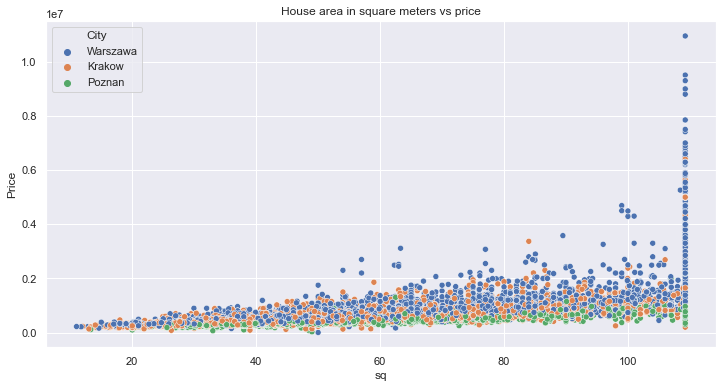

In [32]:
plt.figure(figsize=(12,6))
plt.title("House area in square meters vs price")
sns.scatterplot(x='sq', y='Price', data=df, hue='City', hue_order = ['Warszawa', 'Krakow', 'Poznan'])
plt.show()

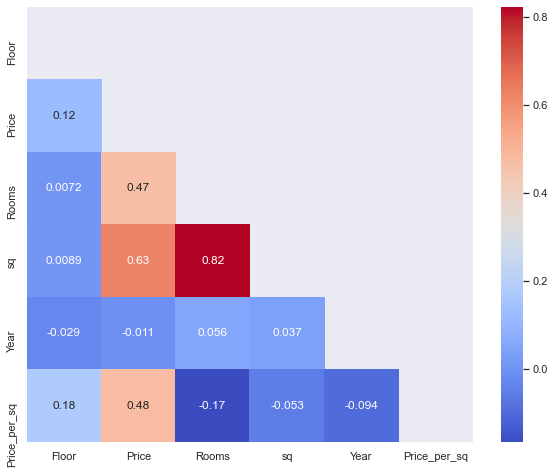

In [33]:
plt.figure(figsize=(10,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.show()